<a href="https://colab.research.google.com/github/jas-tang/datasci_5_statistics/blob/main/datasci_5_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chi-Square Test

In [2]:
import pandas as pd
from scipy.stats import chi2_contingency as chi2

In [ ]:
df = pd.read_csv('/content/sample_data/Hospital_Enrollments_September_2023.csv', encoding='unicode_escape')
df.sample(5)

,"ï»¿""ENROLLMENT ID""",ENROLLMENT STATE,PROVIDER TYPE CODE,PROVIDER TYPE TEXT,NPI,MULTIPLE NPI FLAG,CCN,ASSOCIATE ID,ORGANIZATION NAME,DOING BUSINESS AS NAME,...,SUBGROUP - SHORT-TERM,SUBGROUP - SWING-BED APPROVED,SUBGROUP - PSYCHIATRIC UNIT,SUBGROUP - REHABILITATION UNIT,SUBGROUP - SPECIALTY HOSPITAL,SUBGROUP - OTHER,SUBGROUP - OTHER TEXT,REH CONVERSION FLAG,REH CONVERSION DATE,CAH OR HOSPITAL CCN
9380,O20230505000154,IL,00-09,PART A PROVIDER - HOSPITAL,1750007266,N,14U184,8628367620,DEACONESS REGIONAL HEALTHCARE SERVICES ILLINOI...,HEARTLAND REGIONAL MEDICAL CENTER,...,N,Y,N,N,N,N,NaN,N,NaN,NaN
5159,O20090518000134,IA,00-09,PART A PROVIDER - HOSPITAL,1942241955,N,160040,1052229549,SARTORI MEMORIAL HOSPITAL INC,MERCYONE CEDAR FALLS MEDICAL CENTER,...,N,N,N,N,N,N,NaN,N,NaN,NaN
857,O20041108000765,PR,00-09,PART A PROVIDER - HOSPITAL,1346357225,N,404004,8325012545,"FIRST HOSPITAL PANAMERICANO, INC.",FIRST HOSPITAL PANAMERICANO,...,N,N,N,N,N,N,NaN,N,NaN,NaN
3739,O20071213000730,TX,00-09,PART A PROVIDER - HOSPITAL,1255325817,N,450133,6901709013,MIDLAND COUNTY HOSPITAL DISTRICT,MIDLAND MEMORIAL HOSPITAL,...,N,N,N,N,N,N,NaN,N,NaN,NaN
437,O20031125000290,OK,00-09,PART A PROVIDER - HOSPITAL,1144212556,N,370083,4284538869,PUSHMATAHA COUNTY HOSPITAL AUTHORITY,PUSHMATAHA HOSPITAL,...,N,Y,N,N,N,N,NaN,N,NaN,NaN


In [ ]:
df.columns

Index(['ï»¿"ENROLLMENT ID"', 'ENROLLMENT STATE', 'PROVIDER TYPE CODE',
       'PROVIDER TYPE TEXT', 'NPI', 'MULTIPLE NPI FLAG', 'CCN', 'ASSOCIATE ID',
       'ORGANIZATION NAME', 'DOING BUSINESS AS NAME', 'INCORPORATION DATE',
       'INCORPORATION STATE', 'ORGANIZATION TYPE STRUCTURE',
       'ORGANIZATION OTHER TYPE TEXT', 'PROPRIETARY NONPROFIT',
       'ADDRESS LINE 1', 'ADDRESS LINE 2', 'CITY', 'STATE', 'ZIP CODE',
       'PRACTICE LOCATION TYPE', 'LOCATION OTHER TYPE TEXT',
       'SUBGROUP - GENERAL', 'SUBGROUP - ACUTE CARE',
       'SUBGROUP - ALCOHOL DRUG', 'SUBGROUP - CHILDRENS',
       'SUBGROUP - LONG-TERM', 'SUBGROUP - PSYCHIATRIC',
       'SUBGROUP - REHABILITATION', 'SUBGROUP - SHORT-TERM',
       'SUBGROUP - SWING-BED APPROVED', 'SUBGROUP - PSYCHIATRIC UNIT',
       'SUBGROUP - REHABILITATION UNIT', 'SUBGROUP - SPECIALTY HOSPITAL',
       'SUBGROUP - OTHER', 'SUBGROUP - OTHER TEXT', 'REH CONVERSION FLAG',
       'REH CONVERSION DATE', 'CAH OR HOSPITAL CCN'],
      dtype

Hypothesis: There is an association between if a hospital has more than one NPI (more than one doctor) and that the provider converted from a rural to a critical access hospital.

Null Hypothesis: There is no association between if if a hospital has more than one NPI and that the provider converted from a rural to a critical access hospital.


A flag that indicates whether the hospital has more than 1
NPI (Y/N). If yes, additional NPIs are displayed in the
Hospital Additional NPIs file

In [ ]:
df['MULTIPLE NPI FLAG'].value_counts()

N    8454
Y     939
Name: MULTIPLE NPI FLAG, dtype: int64

A flag that indicates whether the provider is a former hospital
or CAH that converted to an REH (Y/N).

Critical Access Hospitals (CAH)

Rural Emergency Hospitals (REH)

In [ ]:
df['REH CONVERSION FLAG'].value_counts()

N    9385
Y       8
Name: REH CONVERSION FLAG, dtype: int64

In [ ]:
contingency_table = pd.crosstab(df['MULTIPLE NPI FLAG'], df['REH CONVERSION FLAG'])
print(contingency_table)

REH CONVERSION FLAG     N  Y
MULTIPLE NPI FLAG           
N                    8446  8
Y                     939  0


In [ ]:
chi2, p, _, _ = chi2(contingency_table)
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Chi2 value: 0.12492900642152108
P-value: 0.7237488760521203


The P-value being of 0.7 > 0.05 indicates that there is not enough statistical evidence that the variables are associated. This means that there is no strong evidence to reject the null hypothesis.

The Chi2 value being 0.12 indicates that there is a relatively low level of difference between observed and expected values.


## Failed Attempt at Chi Squared Test

In [ ]:
df2 = pd.read_csv('/content/sample_data/c19 nursing home.csv')
df2.sample(5)

<ipython-input-170-df1b46632cbe>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/sample_data/c19 nursing home.csv')


,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,...,Number of All Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week,Number of All Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week who Received a Completed COVID-19 Vaccination at Any Time,Recent Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time,Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time,Number of Residents Staying in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Residents Up to Date with COVID-19 Vaccines,Percentage of Current Residents Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines
1869251,10/10/21,375415,MONROE MANOR,226 E MONROE STREET,JAY,OK,74346,9189193276,Delaware,Y,...,54.0,14.0,NaN,25.926,NaN,NaN,0.000,NaN,NaN,0.000
1048527,06/12/22,225495,TIMBERLYN HEIGHTS NURSING AND REHABILITATION,320 MAPLE AVENUE,GREAT BARRINGTON,MA,1230,4135282650,Berkshire,Y,...,92.0,92.0,NaN,100.000,57.0,NaN,89.063,58.0,NaN,63.043
674690,07/26/20,155428,MERIDIAN NURSING AND REHABILITATION CENTER,2102 S MERIDIAN ST,INDIANAPOLIS,IN,46225,3177869426,Marion,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2081963,08/30/20,425409,EASLEY PLACE-A CONTINUUM OF CARE COMMUNITY,706 PELZER HIGHWAY,EASLEY,SC,29642,8648590167,Pickens,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2528659,12/06/20,675501,LEGACY WEST REHABILITATION AND HEALTHCARE,3300 W 2ND AVE,CORSICANA,TX,75110,9038745333,Navarro,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2.columns

Index(['Week Ending', 'Federal Provider Number', 'Provider Name',
       'Provider Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Provider Phone Number', 'County',
       'Submitted Data', 'Passed Quality Assurance Check',
       'Residents Weekly Confirmed COVID-19',
       'Residents Total Confirmed COVID-19', 'Residents Weekly All Deaths',
       'Residents Total All Deaths', 'Residents Weekly COVID-19 Deaths',
       'Residents Total COVID-19 Deaths', 'Number of All Beds',
       'Total Number of Occupied Beds',
       'Residents Hospitalizations with Confirmed COVID-19',
       'Residents Hospitalizations with Confirmed COVID-19 and Up to Date with Vaccines',
       'Staff Weekly Confirmed COVID-19', 'Staff Total Confirmed COVID-19',
       'Weekly Resident Confirmed COVID-19 Cases Per 1,000 Residents',
       'Weekly Resident COVID-19 Deaths Per 1,000 Residents',
       'Total Resident Confirmed COVID-19 Cases Per 1,000 Residents',
       'Total Residen

In [ ]:
df2['Submitted Data'].value_counts()

Y    2636914
N      18925
Name: Submitted Data, dtype: int64

In [ ]:
df2['Passed Quality Assurance Check'].value_counts()

Y    2623100
N      12701
Name: Passed Quality Assurance Check, dtype: int64

In [ ]:
df2['Passed Quality Assurance Check'].fillna("N", inplace=True)

In [ ]:
df2['Passed Quality Assurance Check'].value_counts()

Y    2623100
N      32739
Name: Passed Quality Assurance Check, dtype: int64

In [ ]:
contingency_table2 = pd.crosstab(df2['Submitted Data'], df2['Passed Quality Assurance Check'])
print(contingency_table2)

Passed Quality Assurance Check      N        Y
Submitted Data                                
N                               18925        0
Y                               13814  2623100


In [ ]:
chi2, p, _, _ = chi2(contingency_table2)
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

TypeError: ignored

# T-Test

The hypothesis is that there isn't a difference between Southern and Non-Southern states for confirmed covid cases in nursing homes.

The null hypothesis is that there is difference between Southern and Non-Southern states for confirmed covid cases in nursing homes.

In [3]:
from scipy.stats import ttest_ind

In [80]:
df2 = pd.read_csv('/content/sample_data/c19 nursing home.csv')
df2.sample(5)

<ipython-input-80-df1b46632cbe>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/sample_data/c19 nursing home.csv')


,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,...,Number of All Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week,Number of All Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week who Received a Completed COVID-19 Vaccination at Any Time,Recent Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time,Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time,Number of Residents Staying in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Residents Up to Date with COVID-19 Vaccines,Percentage of Current Residents Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines
1844222,06/07/20,375122,GRACE SKILLED AND NURSING THERAPY NORMAN,4554 WEST MAIN,NORMAN,OK,73072,4053668800,Cleveland,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2242910,05/30/21,495246,WOODMONT CENTER,11 DAIRY LANE,FREDERICKSBURG,VA,22405,5403719414,Stafford,Y,...,104.0,66.0,NaN,63.462,NaN,NaN,0.000,NaN,NaN,0.0
2401877,03/13/22,555082,VALLEY POINTE NURSING & REHABILITATION CENTER,20090 STANTON AVENUE,CASTRO VALLEY,CA,94546,5105388464,Alameda,Y,...,83.0,80.0,NaN,96.386,NaN,NaN,0.000,NaN,NaN,0.0
2179098,03/12/23,455754,NORTHEAST REHABILITATION AND HEALTHCARE CENTER,603 CORINNE ST,SAN ANTONIO,TX,78218,2108247331,Bexar,Y,...,112.0,43.0,NaN,38.393,4.0,NaN,4.762,0.0,NaN,0.0
1976794,12/13/20,395606,JOHN J KANE REGIONAL CENTER-RO,110 MCINTYRE ROAD,PITTSBURGH,PA,15237,4123692020,Allegheny,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df2['Total Resident Confirmed COVID-19 Cases Per 1,000 Residents'] = df2['Total Resident Confirmed COVID-19 Cases Per 1,000 Residents'].dropna()

In [82]:
df2.sample(10)

,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,...,Number of All Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week,Number of All Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week who Received a Completed COVID-19 Vaccination at Any Time,Recent Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time,Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time,Number of Residents Staying in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Residents Up to Date with COVID-19 Vaccines,Percentage of Current Residents Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines
250779,05/23/21,065386,COLORADO STATE VETERANS NURSING HOME - RIFLE,851 E 5TH ST,RIFLE,CO,81650,9706250842,Garfield,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1613909,09/12/21,345234,HARBORVIEW LUMBERTON,1555 WILLIS AVENUE,LUMBERTON,NC,28358,9107396048,Robeson,Y,...,90.0,39.0,NaN,43.333,NaN,NaN,0.000,NaN,NaN,0.000
336013,05/16/21,105417,HABANA HEALTH CARE CENTER,2916 HABANA WAY,TAMPA,FL,33614,8138765141,Hillsborough,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2544289,09/27/20,675701,LAWRENCE STREET HEALTH CARE CENTER,615 LAWRENCE ST,TOMBALL,TX,77375,2813574516,Harris,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576753,06/06/21,145794,FAIRVIEW HAVEN,605 NORTH 4TH STREET,FAIRBURY,IL,61739,8156922572,Livingston,Y,...,133.0,70.0,NaN,52.632,NaN,NaN,0.000,NaN,NaN,0.000
1983709,09/04/22,395660,CLAREMONT NURSING & REHABILITATION CENTER,1000 CLAREMONT ROAD,CARLISLE,PA,17013,7172432031,Cumberland,Y,...,181.0,148.0,NaN,81.768,142.0,NaN,81.609,62.0,NaN,34.254
1724389,10/10/21,365591,SHADY LAWN NURSING HOME,15028 OLD LINCOLNWAY EAST,DALTON,OH,44618,3308282278,Wayne,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN
1965278,04/03/22,395512,SUNBURY SKILLED NURSING AND REHABILITATION CENTER,901 COURT STREET,SUNBURY,PA,17801,5702867121,Northumberland,Y,...,148.0,114.0,NaN,77.027,NaN,NaN,0.000,NaN,NaN,0.000
1948403,08/14/22,395379,WECARE AT LOYALSOCK REHABILITATION AND NURSING...,1445 SYCAMORE ROAD,MONTOURSVILLE,PA,17754,5706018100,Lycoming,Y,...,134.0,112.0,NaN,83.582,70.0,NaN,66.038,35.0,NaN,26.119
2505549,03/19/23,675217,ELKHART OAKS CARE CENTER,214 JONES RD,ELKHART,TX,75839,9037642291,Anderson,Y,...,52.0,31.0,NaN,59.615,35.0,NaN,81.395,31.0,NaN,59.615


In [83]:
df2['Provider State'].value_counts()

TX    210908
CA    206204
OH    166100
IL    122828
FL    122471
PA    119366
NY    106931
IN     92009
MO     90078
MI     75609
IA     74570
NC     74358
MA     63435
MN     62789
GA     62727
NJ     61929
WI     60081
KS     55817
TN     54635
OK     51789
VA     50288
KY     49126
LA     47500
AL     39616
MD     39394
AR     38709
CO     38595
CT     36163
MS     35613
WA     34974
NE     33439
SC     32947
AZ     25042
OR     22659
WV     21478
SD     17837
UT     17101
ME     15721
ID     14129
ND     13662
RI     13400
NH     12817
NM     12020
MT     11838
NV     11630
DE      7865
HI      7469
WY      6280
VT      6094
AK      3499
DC      3050
PR      1075
GU       175
Name: Provider State, dtype: int64

In [84]:
df2['Total Resident Confirmed COVID-19 Cases Per 1,000 Residents'].value_counts()

0.00       221877
1000.00     28826
500.00      11155
666.67       9092
750.00       7413
            ...  
367.13          1
478.93          1
452.96          1
456.45          1
1855.35         1
Name: Total Resident Confirmed COVID-19 Cases Per 1,000 Residents, Length: 47679, dtype: int64

In [85]:
df2['is_southern'] = df2['Provider State'].apply(lambda x: 'southern' if x in ['AL',
        'AR', 'DE', 'DC', 'FL', 'GA',
        'KY', 'LA', 'MD', 'MS', 'NC',
        'OKa', 'SC', 'TN', 'TX', 'VA',
        'WV'] else 'non-southern')

In [90]:
southern_data = df2[df2['is_southern'] == 'southern']['Total Resident Confirmed COVID-19 Cases Per 1,000 Residents']
southern_data

0          1000.00
1          1071.43
2          1046.51
3          1046.51
4          1000.00
            ...   
2655834        NaN
2655835        NaN
2655836        NaN
2655837        NaN
2655838        NaN
Name: Total Resident Confirmed COVID-19 Cases Per 1,000 Residents, Length: 890685, dtype: float64

In [87]:
non_southern_data = df2[df2['is_southern'] == 'non-southern']['Total Resident Confirmed COVID-19 Cases Per 1,000 Residents']
non_southern_data

39616        0.00
39617        0.00
39618        0.00
39619        0.00
39620        0.00
            ...  
2487262    736.84
2487263    700.00
2487264    750.00
2487265    789.47
2487266    750.00
Name: Total Resident Confirmed COVID-19 Cases Per 1,000 Residents, Length: 1765154, dtype: float64

In [91]:
t_stat, p_val = ttest_ind(non_southern_data, southern_data, equal_var=False, nan_policy='omit')
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -52.560788818904456
P-value: 0.0


This low T-stat tells me that the groups are similar and have similar means. The p-value being < 05 tells me that the two groups are statistically significant. This tells me to reject the null hypothesis. There isn't a difference between southern and non-southern states for the prevalance of covid 19 in nursing homes.

In [92]:
southern_mean = southern_data.mean()
non_southern_mean = non_southern_data.mean()

print(f"Mean prevalence for southern states: {southern_mean}")
print(f"Mean prevalence for non-southern states: {non_southern_mean}")

Mean prevalence for southern states: 862.2756595966712
Mean prevalence for non-southern states: 800.2920560366094


# ANOVA

Is there a significant difference between the mean values of enrollment for child health plus between Race?

Is there a significant difference between the mean values of enrollment for child health plus between Gender?

Is there a significant difference between the mean values of enrollment for child health plus between any combination of Race and Gender?

The hypothesis is that there is significant difference between race and gender for enrollment of child health plus plans.

The null hypothesis that that there is no significant difference between race and gender for enrollment of child health plus plans.

In [94]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [93]:
df3 = pd.read_csv('/content/sample_data/childhplusenrollment.csv')
df3

,Eligibility Year,Eligibility Month,Economic Region,Plan Name,Gender,Age Group,Race,Number of Enrollees
0,2021,5,Long Island,AFFINITY HEALTH PLAN,Female,0-5,Asian,26
1,2021,5,Long Island,AFFINITY HEALTH PLAN,Female,0-5,Black,14
2,2021,5,Long Island,AFFINITY HEALTH PLAN,Female,0-5,Hispanic,1
3,2021,5,Long Island,AFFINITY HEALTH PLAN,Female,0-5,Other,316
4,2021,5,Long Island,AFFINITY HEALTH PLAN,Female,0-5,White,75
...,...,...,...,...,...,...,...,...
278418,2023,9,Western,UNITED HEALTHCARE COMM PLAN,Male,13-19,Hispanic,11
278419,2023,9,Western,UNITED HEALTHCARE COMM PLAN,Male,13-19,Other,26
278420,2023,9,Western,UNITED HEALTHCARE COMM PLAN,Male,6-12,Hispanic,7
278421,2023,9,Western,UNITED HEALTHCARE COMM PLAN,Male,6-12,Other,44


In [96]:
df3.rename(columns={'Number of Enrollees': 'enrollees'}, inplace = True)

In [97]:
df3

,Eligibility Year,Eligibility Month,Economic Region,Plan Name,Gender,Age Group,Race,enrollees
0,2021,5,Long Island,AFFINITY HEALTH PLAN,Female,0-5,Asian,26
1,2021,5,Long Island,AFFINITY HEALTH PLAN,Female,0-5,Black,14
2,2021,5,Long Island,AFFINITY HEALTH PLAN,Female,0-5,Hispanic,1
3,2021,5,Long Island,AFFINITY HEALTH PLAN,Female,0-5,Other,316
4,2021,5,Long Island,AFFINITY HEALTH PLAN,Female,0-5,White,75
...,...,...,...,...,...,...,...,...
278418,2023,9,Western,UNITED HEALTHCARE COMM PLAN,Male,13-19,Hispanic,11
278419,2023,9,Western,UNITED HEALTHCARE COMM PLAN,Male,13-19,Other,26
278420,2023,9,Western,UNITED HEALTHCARE COMM PLAN,Male,6-12,Hispanic,7
278421,2023,9,Western,UNITED HEALTHCARE COMM PLAN,Male,6-12,Other,44


In [98]:
model = ols('enrollees ~ C(Race) * C(Gender)', data=df3).fit()
model

In [99]:
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                         sum_sq        df            F        PR(>F)
C(Race)            5.920157e+09       5.0  6216.421584  0.000000e+00
C(Gender)          1.367837e+07       1.0    71.814400  2.375483e-17
C(Race):C(Gender)  8.138360e+06       5.0     8.545631  4.200760e-08
Residual           5.302848e+10  278411.0          NaN           NaN


In [101]:
df3.groupby('Race')['enrollees'].mean()

Race
Asian              100.428293
Black               97.979895
Hispanic           190.645307
Native American      4.315089
Other              387.262887
White              393.154588
Name: enrollees, dtype: float64

In [102]:
df3.groupby('Gender')['enrollees'].mean()

Gender
Female    223.220469
Male      235.878485
Name: enrollees, dtype: float64

The large F-statistic says that the means of each group vary greatly from the overall mean group. At least one of the group means is vastly different from the others.

The p-values being less than 0.05 means we reject the null hypothesis. This means that there are statistically significant differences between the race and gender of child health plus enrollment.

# Regression Analysis

The hypothesis is that there is a relationship between the number of covid tests and the number of positive cases. The more tests you conduct, the higher number of cases.

The null hypothesis is that there is no relationship between the number covid tests and the number of positive cases.

In [126]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [109]:
df4 = pd.read_csv('/content/sample_data/nyscovid19.csv')
df4

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,Test % Positive,Geography
0,08/30/2023,Albany,17,80708,103,1473117,10.99%,COUNTY
1,08/30/2023,Allegany,0,11055,1,258396,0.00%,COUNTY
2,08/30/2023,Bronx,142,520477,1099,9553142,12.46%,COUNTY
3,08/30/2023,Broome,33,60508,87,1248106,38.10%,COUNTY
4,08/30/2023,Capital Region,63,292624,356,5538348,16.47%,REGION
...,...,...,...,...,...,...,...,...
93289,03/01/2020,Wayne,0,0,0,0,0.00%,COUNTY
93290,03/01/2020,Westchester,0,0,0,0,0.00%,COUNTY
93291,03/01/2020,Western New York,0,0,0,0,0.00%,REGION
93292,03/01/2020,Wyoming,0,0,0,0,0.00%,COUNTY


In [105]:
df4.columns

Index(['Test Date', 'County', 'New Positives',
       'Cumulative Number of Positives', 'Total Number of Tests Performed',
       'Cumulative Number of Tests Performed', 'Test % Positive', 'Geography'],
      dtype='object')

In [110]:
df5 = df4.iloc[:, [3,4,6]].copy()
df5

,Cumulative Number of Positives,Total Number of Tests Performed,Test % Positive
0,80708,103,10.99%
1,11055,1,0.00%
2,520477,1099,12.46%
3,60508,87,38.10%
4,292624,356,16.47%
...,...,...,...
93289,0,0,0.00%
93290,0,0,0.00%
93291,0,0,0.00%
93292,0,0,0.00%


In [112]:
df5 = df5.dropna()

In [113]:
df5.sample(5)

,Cumulative Number of Positives,Total Number of Tests Performed,Test % Positive
7374,11009,11,0.00%
67018,62813,7671,2.01%
45366,106085,6753,7.15%
86659,84,637,0.16%
69598,245869,30567,7.59%


In [119]:
X = df5['Total Number of Tests Performed']
y = df5['Cumulative Number of Positives']

In [120]:
X = sm.add_constant(X)

In [129]:
model = LinearRegression().fit(X, y)

In [135]:
model2 = sm.OLS(y, X).fit()

In [136]:
print(model2.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Cumulative Number of Positives   R-squared:                       0.254
Model:                                        OLS   Adj. R-squared:                  0.254
Method:                             Least Squares   F-statistic:                 3.174e+04
Date:                            Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                                    21:06:48   Log-Likelihood:            -1.3545e+06
No. Observations:                           93294   AIC:                         2.709e+06
Df Residuals:                               93292   BIC:                         2.709e+06
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025   

In [131]:
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

In [137]:
print(f"Slope (Coefficient for Covid): {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared value: {r_squared:.2f}")

Slope (Coefficient for Covid): 0.00
Intercept: 75508.94
R-squared value: 0.25


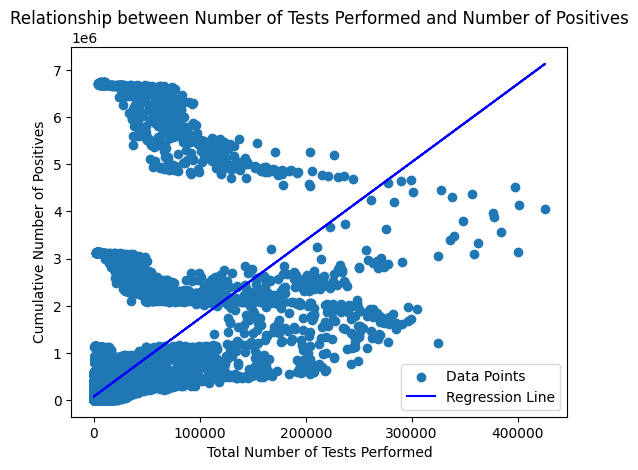

In [124]:
plt.scatter(df5['Total Number of Tests Performed'], df5['Cumulative Number of Positives'], label='Data Points')
plt.plot(df5['Total Number of Tests Performed'], model.predict(X), color='blue', label='Regression Line')
plt.xlabel('Total Number of Tests Performed')
plt.ylabel('Cumulative Number of Positives')
plt.title('Relationship between Number of Tests Performed and Number of Positives')
plt.legend()
plt.show()

The coefficient being 0 indicates that there is no linear relationship between the number of COVID tests conducted and the number of positive cases.

The intercept of 75508.94 suggests that, when there are no COVID tests, the estimated number of positive cases is approximately 75,508.94.

An R-squared value of 0.25 means that approximately 25% of the variability. This means that the model only explains a small portion of the variation.

These results suggest that either this type of test does not fit my data, or that the higher the number of tests does not lead to a change in the number of positive cases.